In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore") 

In [3]:
covid_df = pd.read_csv("covid_19_india.csv")

In [4]:
vaccine_df = pd.read_csv("covid_vaccine_statewise.csv")

In [5]:
covid_df.head(10)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,1/2/2020,6:00 PM,Kerala,2,0,0,0,2
3,4,2/2/2020,6:00 PM,Kerala,3,0,0,0,3
4,5,3/2/2020,6:00 PM,Kerala,3,0,0,0,3
5,6,4/2/2020,6:00 PM,Kerala,3,0,0,0,3
6,7,5/2/2020,6:00 PM,Kerala,3,0,0,0,3
7,8,6/2/2020,6:00 PM,Kerala,3,0,0,0,3
8,9,7/2/2020,6:00 PM,Kerala,3,0,0,0,3
9,10,8/2/2020,6:00 PM,Kerala,3,0,0,0,3


In [6]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3351 entries, 0 to 3350
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       3351 non-null   int64 
 1   Date                      3351 non-null   object
 2   Time                      3351 non-null   object
 3   State/UnionTerritory      3351 non-null   object
 4   ConfirmedIndianNational   3351 non-null   object
 5   ConfirmedForeignNational  3351 non-null   object
 6   Cured                     3351 non-null   int64 
 7   Deaths                    3351 non-null   int64 
 8   Confirmed                 3351 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 235.7+ KB


In [7]:
covid_df.drop(['Sno','ConfirmedIndianNational', 'ConfirmedForeignNational', 'Time'], inplace = True, axis = 1)

In [8]:
covid_df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,30/01/20,Kerala,0,0,1
1,31/01/20,Kerala,0,0,1
2,1/2/2020,Kerala,0,0,2
3,2/2/2020,Kerala,0,0,3
4,3/2/2020,Kerala,0,0,3


In [9]:
#Active Cases

covid_df['Active_Cases'] = covid_df['Confirmed'] - (covid_df['Cured'] + covid_df['Deaths'])

In [10]:
covid_df.tail()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active_Cases
3346,22/06/20,Tripura,782,1,1237,454
3347,22/06/20,Uttarakhand,1521,28,2402,853
3348,22/06/20,Uttar Pradesh,11601,569,18322,6152
3349,22/06/20,West Bengal,8687,569,14358,5102
3350,22/06/20,Cases being reassigned to states,0,0,8015,8015


In [11]:
statewise= pd.pivot_table(covid_df, values=['Cured', 'Deaths', 'Confirmed'], index='State/UnionTerritory', aggfunc = max)

In [12]:
statewise['Recover Rate'] = statewise['Cured']*100/statewise["Confirmed"] 

In [13]:
statewise['Mortality Rate'] = statewise['Deaths']*100/statewise['Confirmed']

In [14]:
statewise = statewise.sort_values(by = 'Confirmed', ascending=False)

In [15]:
statewise.style.background_gradient(cmap='YlGnBu')

,Confirmed,Cured,Deaths,Recover Rate,Mortality Rate
State/UnionTerritory,,,,,
Maharashtra,135796,67706,6283,49.858611,4.626793
Delhi,62655,36602,2233,58.418323,3.563961
Tamil Nadu,62087,34112,794,54.942258,1.278851
Gujarat,27825,19909,1684,71.550764,6.052111
Uttar Pradesh,18322,11601,569,63.317323,3.105556
Rajasthan,15232,11910,356,78.190651,2.337185
West Bengal,14358,8687,569,60.502856,3.962947
Madhya Pradesh,12078,9215,521,76.295744,4.313628
Haryana,11025,5916,169,53.659864,1.532880


In [16]:
#Top 10 Active Cases by states

Top_10_Cases = covid_df.groupby(by='State/UnionTerritory').max()[['Active_Cases', 'Date']].sort_values(by=['Active_Cases'], ascending=False).reset_index()

In [17]:
fig=plt.figure(figsize=(16,9))

<Figure size 1152x648 with 0 Axes>

Text(0.5, 1.0, 'Top 10 States with Most Active Cases in India')

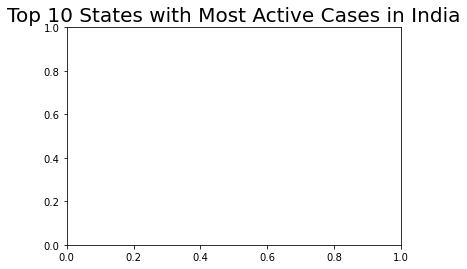

In [18]:
plt.title("Top 10 States with Most Active Cases in India", size=20)

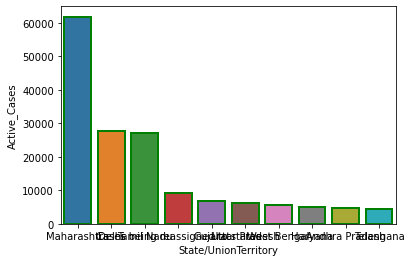

In [19]:
axis= sns.barplot(data = Top_10_Cases.iloc[:10], y='Active_Cases', x="State/UnionTerritory", linewidth=2, edgecolor='green')

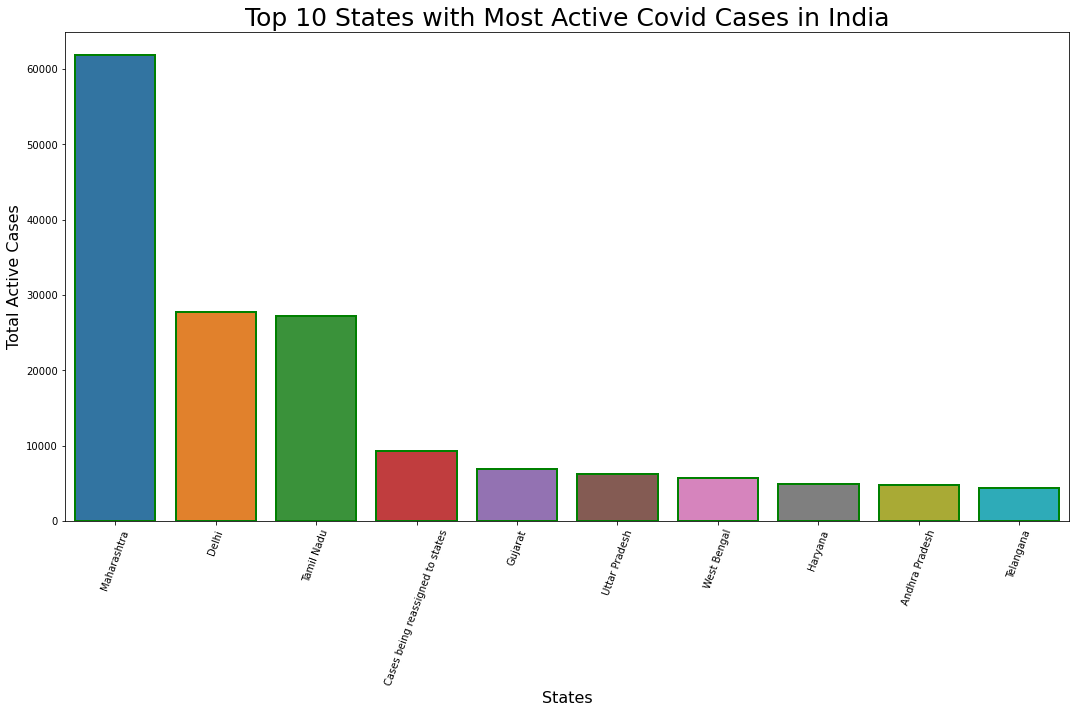

In [20]:
#Top 10 Active Cases by states

Top_10_Cases = covid_df.groupby(by='State/UnionTerritory').max()[['Active_Cases', 'Date']].sort_values(by=['Active_Cases'], ascending=False).reset_index()
fig=plt.figure(figsize=(18,9))
plt.title("Top 10 States with Most Active Covid Cases in India", size=25)
axis= sns.barplot(data = Top_10_Cases.iloc[:10], y='Active_Cases', x="State/UnionTerritory", linewidth=2, edgecolor='green')

plt.xlabel('States', size=16)
plt.ylabel('Total Active Cases', size=16)
plt.xticks(rotation=70)
plt.show()

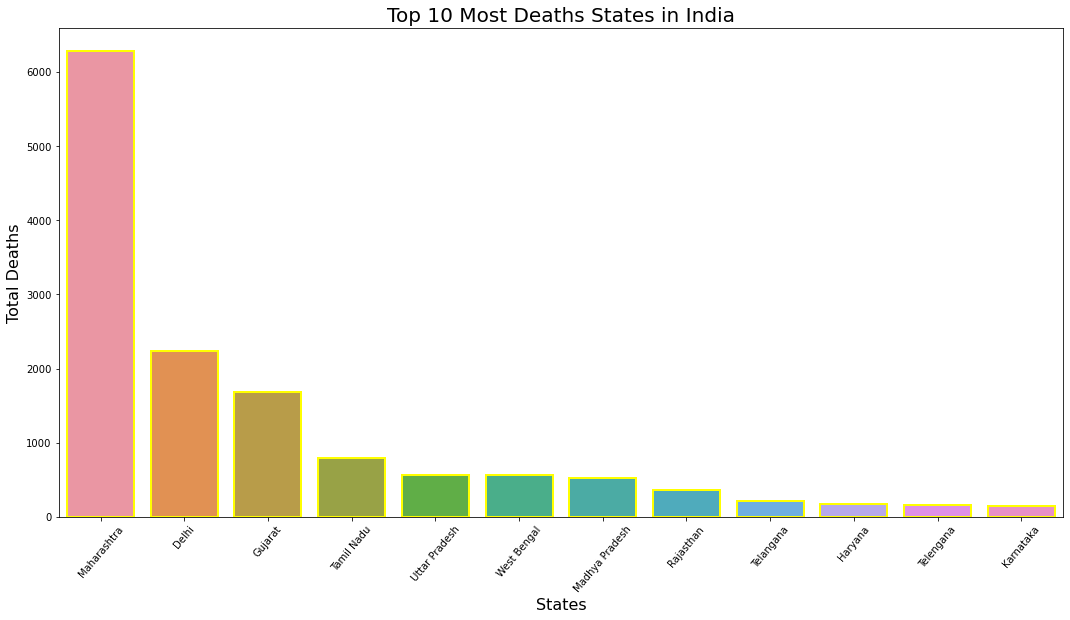

In [21]:
# Top Highest Deaths States

Top_10_death_states = covid_df.groupby(by = 'State/UnionTerritory').max()[['Deaths', 'Date']].sort_values(by = ['Deaths'], ascending=False).reset_index()
fig=plt.figure(figsize=(18,9))
plt.title('Top 10 Most Deaths States in India', size=20)
axis= sns.barplot(data = Top_10_death_states.iloc[:12], y='Deaths', x="State/UnionTerritory", linewidth=2, edgecolor='yellow')

plt.xlabel("States", size=16)
plt.ylabel("Total Deaths", size =16)
plt.xticks(rotation = 50)
plt.show()

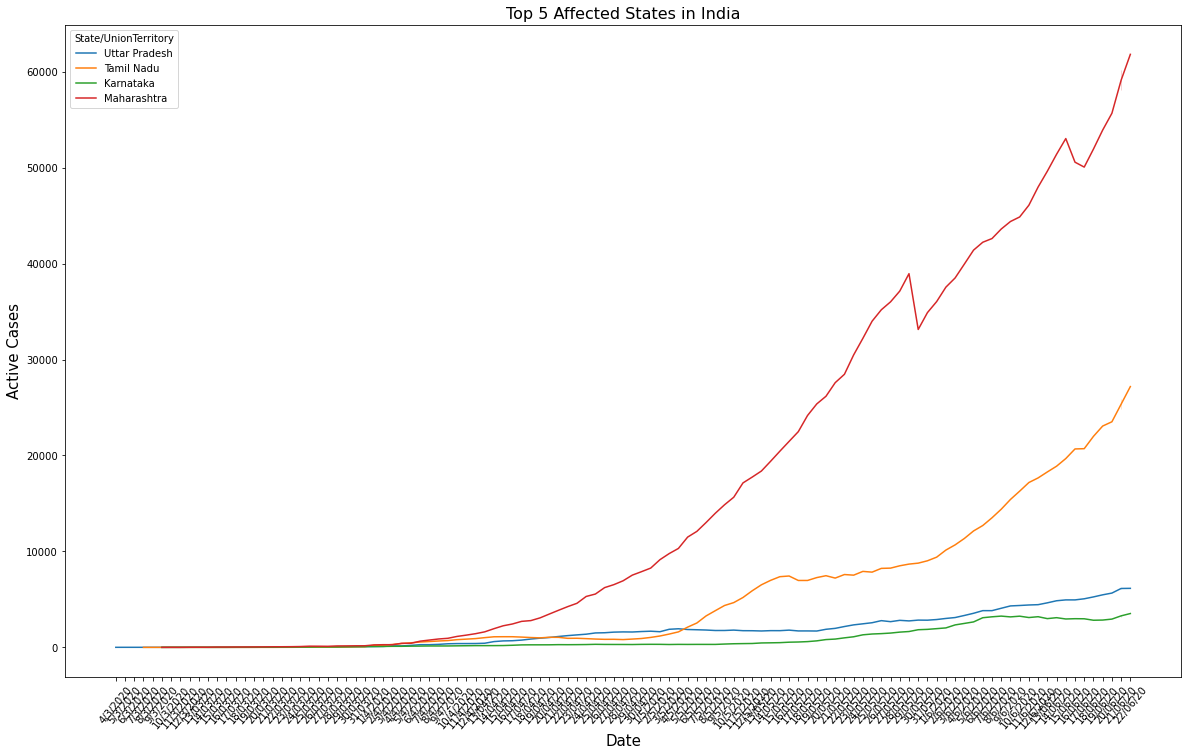

In [22]:


fig = plt.figure(figsize=(20,12))
ax = sns.lineplot(data = covid_df[covid_df['State/UnionTerritory'].isin(['Maharashtra','Karnataka','Kerela','Tamil Nadu','Uttar Pradesh'])],x='Date',y='Active_Cases',hue = 'State/UnionTerritory')

ax.set_title("Top 5 Affected States in India",size = 16)
plt.xlabel("Date", size=15)
plt.ylabel("Active Cases" ,size=15)
plt.xticks(rotation = 50)
plt.rcParams["xtick.labelsize"] = 7
plt.show()


In [23]:
#vaccine data

vaccine_df.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [24]:
vaccine_df.rename(columns={'Updated On' : 'Vaccine Date'}, inplace = True)

In [25]:
vaccine_df.head()

,Vaccine Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [26]:
vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Vaccine Date                         7845 non-null   object 
 1   State                                7845 non-null   object 
 2   Total Doses Administered             7621 non-null   float64
 3   Sessions                             7621 non-null   float64
 4    Sites                               7621 non-null   float64
 5   First Dose Administered              7621 non-null   float64
 6   Second Dose Administered             7621 non-null   float64
 7   Male (Doses Administered)            7461 non-null   float64
 8   Female (Doses Administered)          7461 non-null   float64
 9   Transgender (Doses Administered)     7461 non-null   float64
 10   Covaxin (Doses Administered)        7621 non-null   float64
 11  CoviShield (Doses Administered

In [27]:
vaccine_df.isnull().sum()

Vaccine Date                              0
State                                     0
Total Doses Administered                224
Sessions                                224
 Sites                                  224
First Dose Administered                 224
Second Dose Administered                224
Male (Doses Administered)               384
Female (Doses Administered)             384
Transgender (Doses Administered)        384
 Covaxin (Doses Administered)           224
CoviShield (Doses Administered)         224
Sputnik V (Doses Administered)         4850
AEFI                                   2407
18-44 Years (Doses Administered)       6143
45-60 Years (Doses Administered)       6143
60+ Years (Doses Administered)         6143
18-44 Years(Individuals Vaccinated)    4112
45-60 Years(Individuals Vaccinated)    4111
60+ Years(Individuals Vaccinated)      4111
Male(Individuals Vaccinated)           7685
Female(Individuals Vaccinated)         7685
Transgender(Individuals Vaccinat

In [46]:
vaccine_df = vaccine_df.drop(columns = ['Sputnik V (Doses Administered)', 'AEFI', '18-44 Years (Doses Administered)', '45-60 Years (Doses Administered)', '60+ Years (Doses Administered)'], axis= 1)

KeyError: "['Sputnik V (Doses Administered)', 'AEFI', '18-44 Years (Doses Administered)', '45-60 Years (Doses Administered)', '60+ Years (Doses Administered)'] not found in axis"

In [43]:
vaccine_df.head()

,Vaccine Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,579.0,47697.0,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,635.0,57969.0,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,1299.0,98150.0,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,3017.0,192508.0,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,3946.0,247334.0,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [63]:
# Male vs female vaccinaion

male = vaccine_df['Male(Individuals Vaccinated)'].sum()
female = vaccine_df['Female(Individuals Vaccinated)'].sum()

px.pie(names=['Male', 'Female'], values=[male, female], title='Male and Female Vaccination Comaprision',color_discrete_sequence=px.colors.sequential.RdBu)

In [45]:
#Remove rows where state = india

vaccine = vaccine_df[vaccine_df.State!='India']
vaccine

,Vaccine Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,23.0
213,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,23.0
214,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,0.0,42.0,NaN,NaN,NaN,NaN,NaN,NaN,42.0
215,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,0.0,89.0,NaN,NaN,NaN,NaN,NaN,NaN,89.0
216,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,0.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,11/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7841,12/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7842,13/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7843,14/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
vaccine.rename(columns={"Total Individuals Vaccinated": "Total"}, inplace= True)

vaccine.head()

,Vaccine Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,23.0
213,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,23.0
214,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,0.0,42.0,NaN,NaN,NaN,NaN,NaN,NaN,42.0
215,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,0.0,89.0,NaN,NaN,NaN,NaN,NaN,NaN,89.0
216,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,0.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,124.0


In [51]:
# most vaccinated state

max_vac = vaccine.groupby('State')['Total'].sum().to_frame('Total')
max_vac = max_vac.sort_values('Total', ascending= False)[:5]
max_vac

,Total
State,
Maharashtra,1.403075e+09
Uttar Pradesh,1.200575e+09
Rajasthan,1.141163e+09
Gujarat,1.078261e+09
West Bengal,9.250227e+08


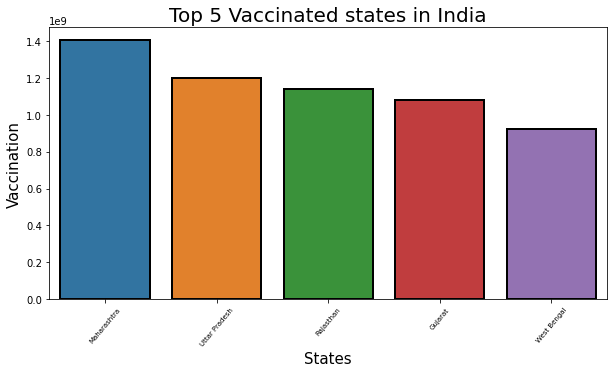

In [59]:
#plotting

fig = plt.figure(figsize=(10,5))
plt.title("Top 5 Vaccinated states in India", size=20)
x= sns.barplot(data= max_vac.iloc[:10], y=max_vac.Total, x=max_vac.index, linewidth=2, edgecolor='black')
plt.xlabel("States", size=15)
plt.ylabel("Vaccination", size=15)
plt.xticks(rotation = 50)
plt.show()

In [55]:
# least vaccinated states

min_vac = vaccine.groupby('State')['Total'].sum().to_frame('Total')
min_vac = min_vac.sort_values('Total', ascending= True)[:5]
min_vac

,Total
State,
Lakshadweep,2124715.0
Andaman and Nicobar Islands,8102125.0
Ladakh,9466289.0
Dadra and Nagar Haveli and Daman and Diu,11358600.0
Sikkim,16136752.0


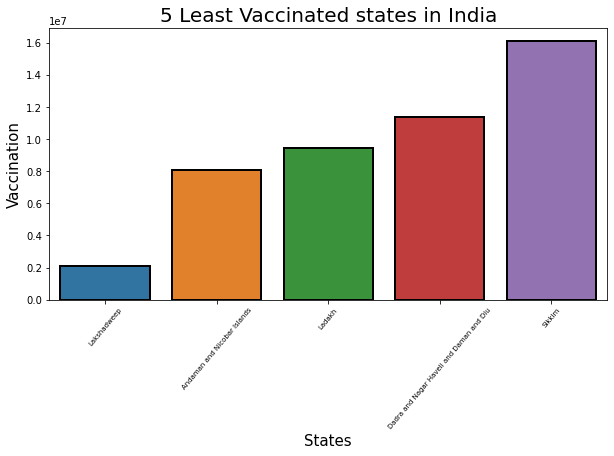

In [60]:
#plotting

fig = plt.figure(figsize=(10,5))
plt.title("5 Least Vaccinated states in India", size=20)
x= sns.barplot(data= min_vac.iloc[:10], y=min_vac.Total, x=min_vac.index, linewidth=2, edgecolor='black')
plt.xlabel("States", size=15)
plt.ylabel("Vaccination", size=15)
plt.xticks(rotation = 50)
plt.show()